# Time Series Forecasting with LSTM
Daily Climate Time Series Data (Kaggle)

## 1. Imports

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


## 2. Load Dataset

In [2]:

df = pd.read_csv("DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
temperature = df[['meantemp']]
temperature.head()


,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


## 3. Visualization

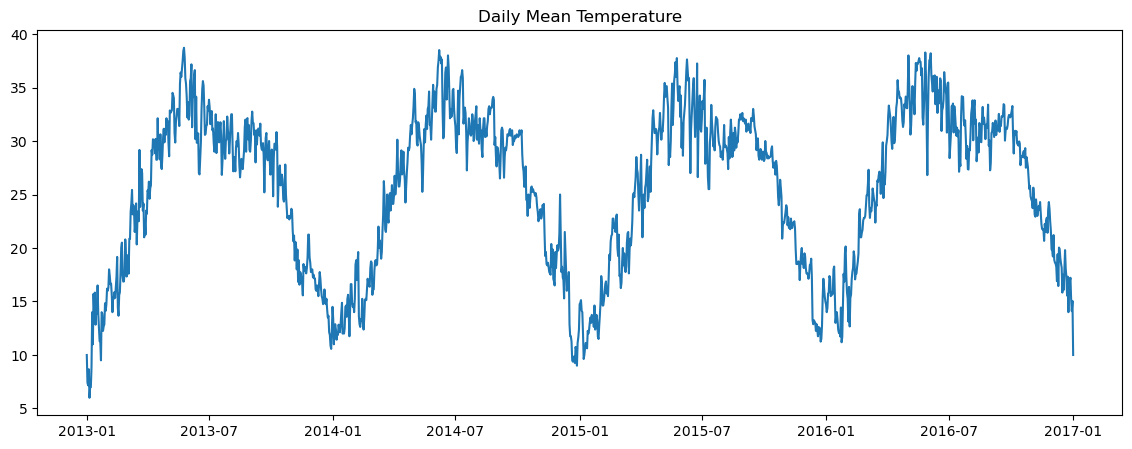

In [3]:

plt.figure(figsize=(14,5))
plt.plot(temperature)
plt.title("Daily Mean Temperature")
plt.show()


## 4. Decomposition

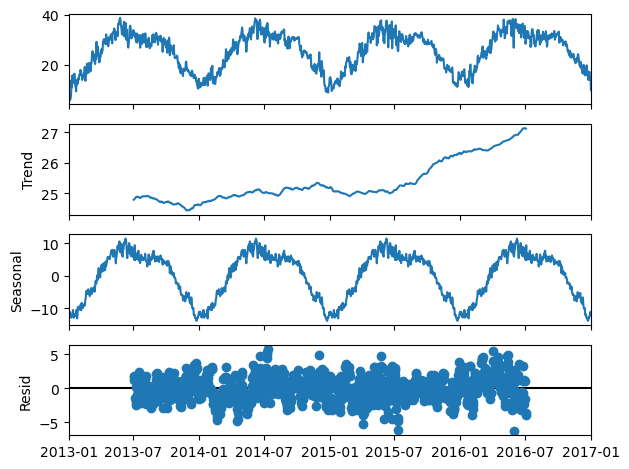

In [4]:

seasonal_decompose(temperature, model='additive', period=365).plot()
plt.show()


## 5. ADF Test

In [5]:

result = adfuller(temperature['meantemp'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -2.021069055920669
p-value: 0.277412137230162


## 6. Scaling & Sequences

In [6]:

scaler = MinMaxScaler()
scaled = scaler.fit_transform(temperature)

def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

WINDOW = 30
X, y = create_sequences(scaled, WINDOW)
X = X.reshape((X.shape[0], X.shape[1], 1))


## 7. Train/Test Split

In [7]:

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


## 8. LSTM Model

In [8]:

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()


c:\Users\landm\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

## 9. Training

In [9]:

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - loss: 0.0394 - val_loss: 0.0086
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0103 - val_loss: 0.0054
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0086 - val_loss: 0.0046
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0083 - val_loss: 0.0044
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0073 - val_loss: 0.0042
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0

## 10. Evaluation

In [10]:

pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(actual, pred))
mae = mean_absolute_error(actual, pred)

print("RMSE:", rmse)
print("MAE:", mae)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step
RMSE: 1.9269701923445537
MAE: 1.4866576629155814


## 11. Results Visualization

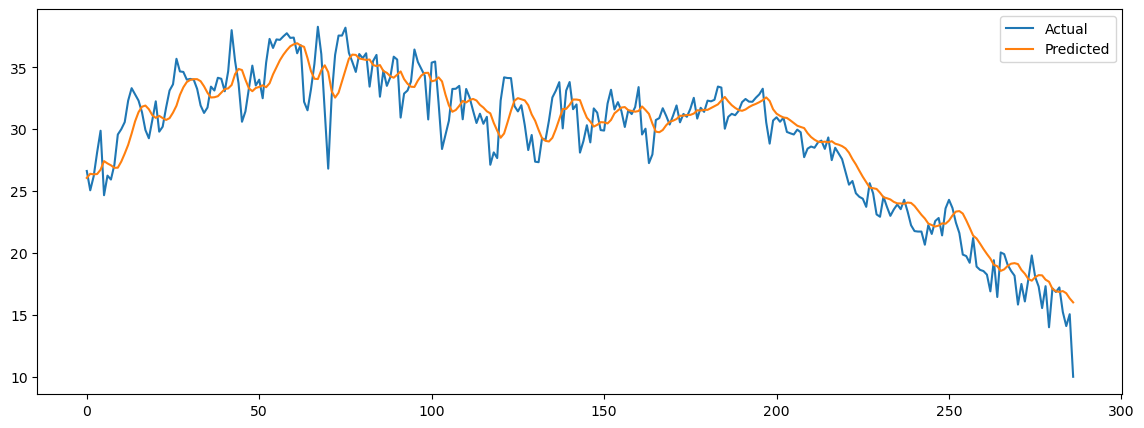

In [11]:

plt.figure(figsize=(14,5))
plt.plot(actual, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.show()
